<a href="https://colab.research.google.com/github/ayuko66/akiya-lens/blob/main/notebook/akiya_lens_%E6%AE%8B%E5%B7%AE%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize_matplotlib
import japanize_matplotlib as jmp

In [ ]:
!pip install catboost
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
import shap

# データ読み込み
df_fiscal_delta = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_projects/akiya-lens/fiscal_features__wide__delta__v1__2018_2023.csv")
df_featuers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_projects/akiya-lens/features_master__wide__v1.csv")
df_fiscal_long = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_projects/akiya-lens/fiscal_features.csv")

df_fiscal_long の2023年 の"財政力指数", "交付税依存度", "住民基本台帳登載人口"
2018年 の住民基本台帳登載人口  をdfに追加


In [ ]:
print(df_fiscal_long.columns)

Index(['年度', '市区町村コード', '市区町村名', '住民基本台帳登載人口', '財政力指数', '財政力指数_ロバスト', '経常収支比率',
       '経常収支比率_ロバスト', '実質公債費比率', '将来負担比率', '基準財政需要額', '基準財政収入額', '標準財政規模',
       '地方税', '人口あたり地方税', '地方交付税', '民生費', '民生費割合', '教育費', '教育費割合', '土木費',
       '土木費割合', '人件費', '公債費', '扶助費', '地方債現在高', '人口あたり地方債現在高', '歳出総額',
       '交付税依存度'],
      dtype='object')


In [ ]:
df = pd.merge(df_fiscal_delta, df_featuers, on='市区町村コード')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.columns.to_list())

['市区町村コード', '市区町村名_2018', '市区町村名_2023', '住民基本台帳登載人口_2018', '住民基本台帳登載人口_2023', '地方税_2018', '地方税_2023', '地方税_欠損', '地方税_変化量', '地方税_変化率', '地方税_ログ差分', '地方交付税_2018', '地方交付税_2023', '地方交付税_欠損', '地方交付税_変化量', '地方交付税_変化率', '地方交付税_ログ差分', '民生費_2018', '民生費_2023', '民生費_欠損', '民生費_変化量', '民生費_変化率', '民生費_ログ差分', '教育費_2018', '教育費_2023', '教育費_欠損', '教育費_変化量', '教育費_変化率', '教育費_ログ差分', '土木費_2018', '土木費_2023', '土木費_欠損', '土木費_変化量', '土木費_変化率', '土木費_ログ差分', '人件費_2018', '人件費_2023', '人件費_欠損', '人件費_変化量', '人件費_変化率', '人件費_ログ差分', '公債費_2018', '公債費_2023', '公債費_欠損', '公債費_変化量', '公債費_変化率', '公債費_ログ差分', '扶助費_2018', '扶助費_2023', '扶助費_欠損', '扶助費_変化量', '扶助費_変化率', '扶助費_ログ差分', '地方債現在高_2018', '地方債現在高_2023', '地方債現在高_欠損', '地方債現在高_変化量', '地方債現在高_変化率', '地方債現在高_ログ差分', '市区町村名', '都道府県名', '2018_15〜64歳人口', '2018_15歳未満人口', '2018_65歳以上人口', '2018_出生数', '2018_出生率[‰]', '2018_年少人口率[%]', '2018_死亡数', '2018_死亡率[‰]', '2018_生産年齢人口率[%]', '2018_総人口', '2018_転入率[‰]', '2018_転入者数', '2018_転入超過率[‰]', '2018_転出率[‰]', '2018_転出者数', '2018_高齢化率[%]', 'スーパー件数', 'スーパー密度[件/km

In [ ]:
df_fiscal_long_2023 = df_fiscal_long[df_fiscal_long['年度'] == 2023][['市区町村コード', '財政力指数', '交付税依存度', '民生費割合', '教育費割合', '土木費割合']]

print(df_fiscal_long_2023.columns)

df = pd.merge(df, df_fiscal_long_2023, on='市区町村コード', how='left')

df["住宅地価_log中央値_変化量"] = df["住宅地価_log中央値_2023"] - df["住宅地価_log中央値_2018"]


df["Δ出生率"] = df["2023_出生率[‰]"] - df["2018_出生率[‰]"]
df["Δ死亡率"] = df["2023_死亡率[‰]"] - df["2018_死亡率[‰]"]
df["Δ年少人口率"] = df["2023_年少人口率[%]"] - df["2018_年少人口率[%]"]
df["Δ高齢化率"] = df["2023_高齢化率[%]"] - df["2018_高齢化率[%]"]
df["Δ生産年齢人口率"] = df["2023_生産年齢人口率[%]"] - df["2018_生産年齢人口率[%]"]
df["Δ転入超過率"] = df["2023_転入超過率[‰]"] - df["2018_転入超過率[‰]"]
df

display(df.head())

Index(['市区町村コード', '財政力指数', '交付税依存度', '民生費割合', '教育費割合', '土木費割合'], dtype='object')


,市区町村コード,市区町村名_2018,市区町村名_2023,住民基本台帳登載人口_2018,住民基本台帳登載人口_2023,地方税_2018,地方税_2023,地方税_欠損,地方税_変化量,地方税_変化率,地方税_ログ差分,地方交付税_2018,地方交付税_2023,地方交付税_欠損,地方交付税_変化量,地方交付税_変化率,地方交付税_ログ差分,民生費_2018,民生費_2023,民生費_欠損,民生費_変化量,民生費_変化率,民生費_ログ差分,教育費_2018,教育費_2023,教育費_欠損,教育費_変化量,教育費_変化率,教育費_ログ差分,土木費_2018,土木費_2023,土木費_欠損,土木費_変化量,土木費_変化率,土木費_ログ差分,人件費_2018,人件費_2023,人件費_欠損,人件費_変化量,人件費_変化率,人件費_ログ差分,公債費_2018,公債費_2023,公債費_欠損,公債費_変化量,公債費_変化率,公債費_ログ差分,扶助費_2018,扶助費_2023,扶助費_欠損,扶助費_変化量,扶助費_変化率,扶助費_ログ差分,地方債現在高_2018,地方債現在高_2023,地方債現在高_欠損,地方債現在高_変化量,地方債現在高_変化率,地方債現在高_ログ差分,市区町村名,都道府県名,2018_15〜64歳人口,2018_15歳未満人口,2018_65歳以上人口,2018_出生数,2018_出生率[‰],2018_年少人口率[%],2018_死亡数,2018_死亡率[‰],2018_生産年齢人口率[%],2018_総人口,2018_転入率[‰],2018_転入者数,2018_転入超過率[‰],2018_転出率[‰],2018_転出者数,2018_高齢化率[%],スーパー件数,スーパー密度[件/km²],2023年総人口あたりのスーパー密度,住宅地価_log中央値_2018,住宅地価_log中央値_2023,住宅地価_log差分,住宅地価_中央値_2018,住宅地価_中央値_2023,住宅地価_増減率[%],学校件数,学校密度[件/km²],2023年総人口あたりの学校密度,平均気温,年最深積雪,年降水量,最低気温,最高気温,標準地点数_2018,標準地点数_2023,病院件数,病院密度[件/km²],2023年総人口あたりの病院密度,空き家_2018,空き家_2023,空き家_増加率_5年_%,空き家率_2018,空き家率_2023,空き家率_差分_5年_pt,住宅総数_2018,住宅総数_2023,過疎地域市町村,都市種別,都道府県コード,駅件数,駅密度[件/km²],2023年総人口あたりの駅密度,住宅総数_2023_raw,空き家_2023_raw,空き家率_2023_raw,2023_総人口,2023_15歳未満人口,2023_15〜64歳人口,2023_65歳以上人口,2023_出生数,2023_死亡数,2023_転入者数,2023_転出者数,2023_高齢化率[%],2023_年少人口率[%],2023_生産年齢人口率[%],2023_出生率[‰],2023_死亡率[‰],2023_転入率[‰],2023_転出率[‰],2023_転入超過率[‰],財政力指数,交付税依存度,民生費割合,教育費割合,土木費割合,住宅地価_log中央値_変化量,Δ出生率,Δ死亡率,Δ年少人口率,Δ高齢化率,Δ生産年齢人口率,Δ転入超過率
0,2408,東北町,東北町,17704,16354,1728098,1802973,0,74875,0.043328,0.042416,4544674,4722103,0,177429,0.039041,0.038298,3174221,3455655,0,281434,0.088662,0.084950,3322307,1237094,0,-2085213,-0.627640,-0.987894,1568967,1780081,0,211114,0.134556,0.126241,1266902,1382996,0,116094,0.091636,0.087678,1335508,1328389.0,0,-7119.0,-0.005331,-0.005345,931913,2312351,0,1380438,1.481295,0.908781,12935311.0,10526926.0,0,-2408385.0,-0.186187,-0.206025,東北町,青森県,9817,1918,6197,96.0,5.353558,10.695963,275.0,15.335713,54.745706,17932,22.808387,409.0,-1.003792,23.812179,427.0,34.558331,8.0,0.024503,0.000472,8.612503,8.517193,-0.095310,5500.0,5000.0,-9.090909,4.0,0.012252,0.000236,17.89,58.0,1314.0,9.55,26.23,3.0,3.0,4.0,0.012252,0.000236,810.0,770.0,-4.938272,11.8421,11.98,0.1379,6840.0,6430.0,A,NaN,2.0,4.0,0.012252,0.000236,NaN,NaN,NaN,16934,1723,8808,6403,72.0,319.0,373.0,406.0,37.811503,10.174796,52.013700,4.251801,18.837841,22.026692,23.975434,-1.948742,0.31,63.909690,0.274944,0.098428,0.141630,-0.095310,-1.101757,3.502128,-0.521166,3.253172,-2.732006,-0.944950
1,2412,おいらせ町,おいらせ町,25214,25148,2581484,2775815,0,194331,0.075279,0.072580,3406213,3771929,0,365716,0.107367,0.101985,3273192,4504955,0,1231763,0.376319,0.319412,1759905,1273080,0,-486825,-0.276620,-0.323821,1386379,1407864,0,21485,0.015497,0.015378,1202252,1307854,0,105602,0.087837,0.084191,1027312,1062514.0,0,35202.0,0.034266,0.033692,2144112,3049109,0,904997,0.422085,0.352124,10692918.0,7716313.0,0,-2976605.0,-0.278372,-0.326245,おいらせ町,青森県,15436,3434,6430,183.0,7.233202,13.573123,283.0,11.185771,61.011858,25300,38.379447,971.0,0.632411,37.747036,955.0,25.415020,4.0,0.025921,0.000158,9.239899,9.510445,0.270546,10300.0,13500.0,31.067961,9.0,0.058323,0.000355,18.40,35.0,1057.1,10.17,26.63,5.0,5.0,2.0,0.012961,0.000079,1030.0,1020.0,-0.970874,10.0195,10.53,0.5105,10280.0,9690.0,NaN,NaN,2.0,2.0,0.012961,0.000079,NaN,NaN,NaN,25324,3502,14884,6938,191.0,324.0,919.0,911.0,27.396936,13.828779,58.774285,7.542252,12.794187,36.289686,35.973780,0.315906,0.46,47.631230,0.377647,0.106721,0.118020,0.270546,0.309051,1.608417,0.255656,1.981916,-2.237572,-0.316505
2,2442,五戸町,五戸町,17306,15653,1477795,1420395,0,-57400,-0.038842,-0.039616,4211861,4702048,0,490187,0.116383,0.110094,2455742,3060908,0,605166,0.246429,0.220283,889561,991192,0,101631,0.114248,0.108180,668432,895673,0,227241,0.339961,0.292641,1117431,1106727,0,-10704,-0.009579,-0.009625,1154809,1040116.0,0,-114693.0,-0.099318,-0.104603,1405902,1847328,0,441426,0.313981,0.273061,11172314.0,9089155.0,0,-2083159.0,-0.186457,-0.206357,五戸町,青森県

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1) 2018/2023 の空き家率が入ってる行だけに絞る（欠損落とし）
cols_needed = ["空き家率_2018", "空き家率_2023"]
df_bl = df.dropna(subset=cols_needed).copy()

# 2) 単回帰ベースライン: 2023 ~ 2018
X_base = df_bl[["空き家率_2018"]].values
y_base = df_bl["空き家率_2023"].values

lr = LinearRegression()
lr.fit(X_base, y_base)

print(f"回帰式: 2023空き家率 ≈ {lr.coef_[0]:.4f} * 2018空き家率 + {lr.intercept_:.4f}")
print(f"R²(単回帰): {lr.score(X_base, y_base):.3f}")

# 3) 残差の算出 (residual: 単回帰モデルでは説明できない空き家率の変化分)
df_bl["baseline_pred"] = lr.predict(X_base)
df_bl["residual"] = df_bl["空き家率_2023"] - df_bl["baseline_pred"]

回帰式: 2023空き家率 ≈ 0.9808 * 2018空き家率 + 1.1311
R²(単回帰): 0.878


In [ ]:
from catboost import CatBoostRegressor, Pool, cv
import numpy as np

# さっき整理した総合モデルの特徴量セットを再利用
X_total = df_bl[[
    "住民基本台帳登載人口_2018","住民基本台帳登載人口_2023",
    "財政力指数","交付税依存度","民生費割合","教育費割合","土木費割合",
    "2018_出生率[‰]","2018_死亡率[‰]","2018_年少人口率[%]","2018_高齢化率[%]",
    "2018_生産年齢人口率[%]","2018_転入超過率[‰]",
    "Δ出生率","Δ死亡率","Δ年少人口率","Δ高齢化率","Δ生産年齢人口率","Δ転入超過率",
    "住宅地価_log中央値_2018","住宅地価_log中央値_変化量",
    "スーパー密度[件/km²]","学校密度[件/km²]","病院密度[件/km²]","駅密度[件/km²]",
    "2023年総人口あたりのスーパー密度","2023年総人口あたりの学校密度",
    "2023年総人口あたりの病院密度","2023年総人口あたりの駅密度",
    "平均気温","年最深積雪","年降水量"
]]

# 残差を目的変数としてCatBoost
y_resid = df_bl["residual"]


params = dict(
    iterations=1000,          # 学習イテレーション数
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",     # 最適化はRMSE
    eval_metric="R2",         # 主表示をR²にする
    custom_metric=["RMSE"],   # RMSEもログに出す
    random_seed=42,
    verbose=False
)

# 交差検証
cv_resid = cv(
    Pool(X_total, y_resid),   # 特徴量とターゲット
    params,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42
)

print(cv_resid.columns)   # 出力されるカラムを確認

Training on fold [0/5]

bestTest = 0.09841320607
bestIteration = 42

Training on fold [1/5]

bestTest = 0.108917679
bestIteration = 68

Training on fold [2/5]

bestTest = 0.0381616899
bestIteration = 235

Training on fold [3/5]

bestTest = 0.1474337337
bestIteration = 78

Training on fold [4/5]

bestTest = 0.3657000713
bestIteration = 364

Index(['iterations', 'test-R2-mean', 'test-R2-std', 'train-R2-mean',
       'train-R2-std', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean',
       'train-RMSE-std'],
      dtype='object')


In [ ]:
r2 = cv_resid["test-R2-mean"].iloc[-1]
rmse = cv_resid["test-RMSE-mean"].iloc[-1]  # すでに√済みなのでそのままRMSE

print(f"残差モデル R² (5-fold mean): {r2:.3f}")
print(f"残差モデル RMSE (5-fold mean): {rmse:.3f}")

残差モデル R² (5-fold mean): 0.107
残差モデル RMSE (5-fold mean): 3.029


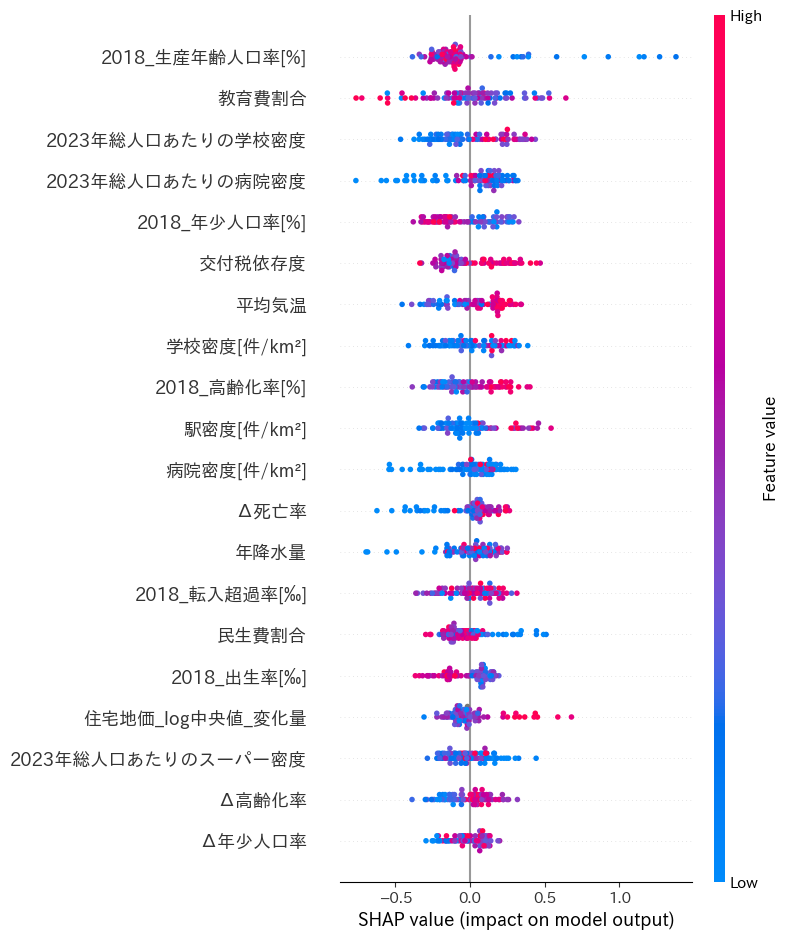

In [ ]:
# SHAP Explainerの作成とSHAP値の計算

# Train a CatBoost model on the full data for SHAP explanation
model_for_shap = CatBoostRegressor(**params)
model_for_shap.fit(X_total, y_resid)

# Create a SHAP explainer
explainer = shap.Explainer(model_for_shap)

# Calculate SHAP values
shap_values = explainer(X_total)

# SHAP summary plot
shap.summary_plot(shap_values, X_total)

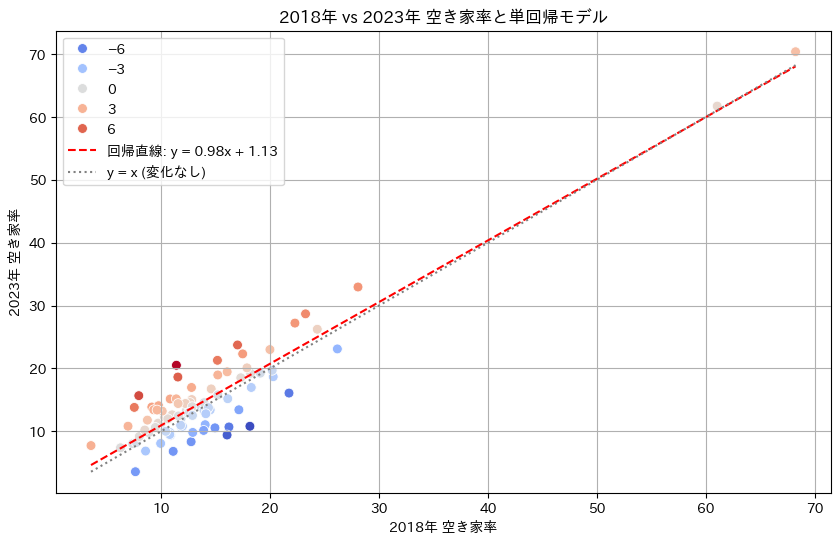

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 散布図の作成
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_bl, x="空き家率_2018", y="空き家率_2023", hue="residual", palette="coolwarm", s=50)

# 回帰直線の描画
x_range = np.array([df_bl["空き家率_2018"].min(), df_bl["空き家率_2018"].max()])
y_pred_range = lr.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred_range, color='red', linestyle='--', label=f'回帰直線: y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}')

# 1:1の線の描画
plt.plot(x_range, x_range, color='gray', linestyle=':', label='y = x (変化なし)')


plt.title('2018年 vs 2023年 空き家率と単回帰モデル')
plt.xlabel('2018年 空き家率')
plt.ylabel('2023年 空き家率')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 残差の上位5地域
print("残差 上位5地域:")
display(df_bl.nlargest(5, 'residual')[['市区町村名_2023', '空き家率_2018', '空き家率_2023', 'baseline_pred', 'residual']])

# 残差の下位5地域
print("\n残差 下位5地域:")
display(df_bl.nsmallest(5, 'residual')[['市区町村名_2023', '空き家率_2018', '空き家率_2023', 'baseline_pred', 'residual']])

残差 上位5地域:


,市区町村名_2023,空き家率_2018,空き家率_2023,baseline_pred,residual
24,会津美里町,11.4168,20.52,12.328135,8.191865
22,庄内町,7.9646,15.68,8.942386,6.737614
54,内灘町,11.5512,18.64,12.459948,6.180052
65,辰野町,17.0261,23.74,17.829461,5.910539
18,三種町,15.1825,21.30,16.021349,5.278651



残差 下位5地域:


,市区町村名_2023,空き家率_2018,空き家率_2023,baseline_pred,residual
89,日野町,18.1624,10.81,18.943889,-8.133889
67,南箕輪村,16.0665,9.42,16.888333,-7.468333
61,富士河口湖町,21.7492,16.09,22.461647,-6.371647
7,金ケ崎町,16.2393,10.70,17.057807,-6.357807
6,矢巾町,12.7678,8.35,13.653129,-5.303129


### 残差の上位5地域と下位5地域のそれぞれをピックアップしSHAPの可視化

In [ ]:
# 残余スコアに基づいて上位 5 位と下位 5 位の自治体の指数を取得
top_residual_indices = df_bl.nlargest(5, 'residual').index
bottom_residual_indices = df_bl.nsmallest(5, 'residual').index

In [ ]:
# 上位残余自治体と下位残余自治体の指数を結合
combined_indices = top_residual_indices.union(bottom_residual_indices)
display(combined_indices)

Index([6, 7, 18, 22, 24, 54, 61, 65, 67, 89], dtype='int64')

In [ ]:
top_n = 5
top_shap_info = {}

for i, index in enumerate(combined_indices):
    info = {}
    # Select SHAP values for the current index
    info['shap_values'] = shap_values.values[index]
    # Select feature values for the current index
    info['feature_values'] = shap_values.data[index]
    # Get the base value (assuming a single base value for residuals)
    info['base_value'] = shap_values.base_values[0]
    # Store feature names (optional but helpful)
    info['features'] = X_total.columns.tolist()

    # Sort features and SHAP values by absolute SHAP value for displaying top_n
    sorted_indices = np.argsort(np.abs(info['shap_values']))[::-1]
    info['features'] = [info['features'][j] for j in sorted_indices[:top_n]]
    info['shap_values'] = info['shap_values'][sorted_indices[:top_n]]
    info['feature_values'] = info['feature_values'][sorted_indices[:top_n]]

    top_shap_info[index] = info

# You can inspect the top_shap_info dictionary if needed
# print(top_shap_info)

#### 選択した自治体を反復処理し、それぞれについて SHAP 棒グラフを作成して、残差への特徴の寄与を視覚化


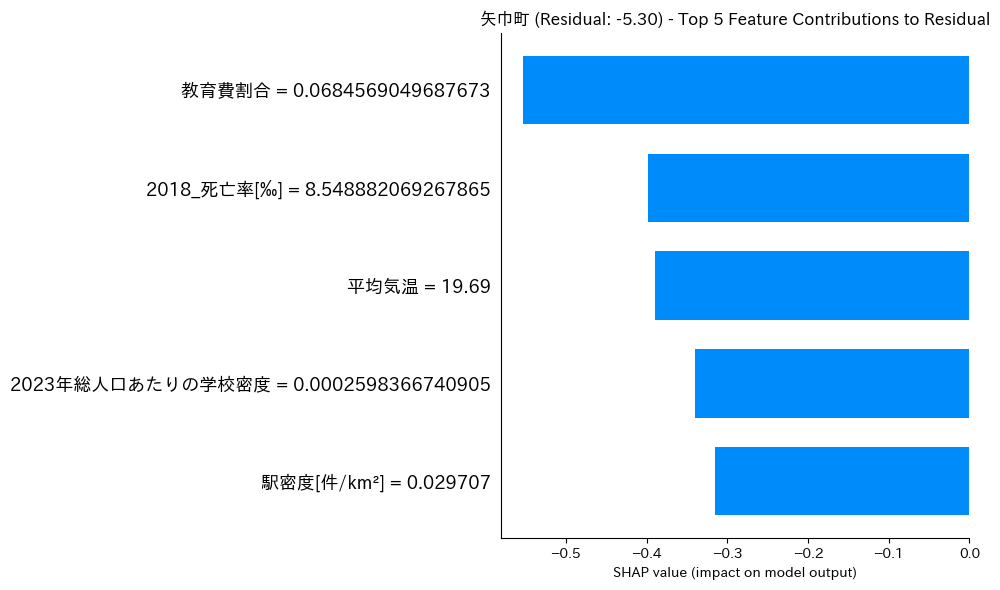

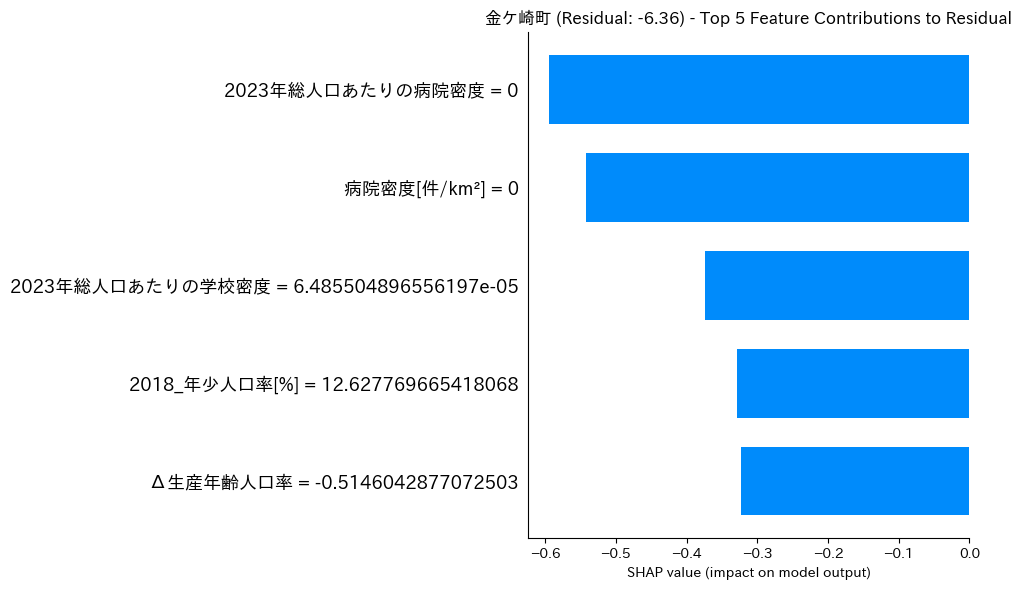

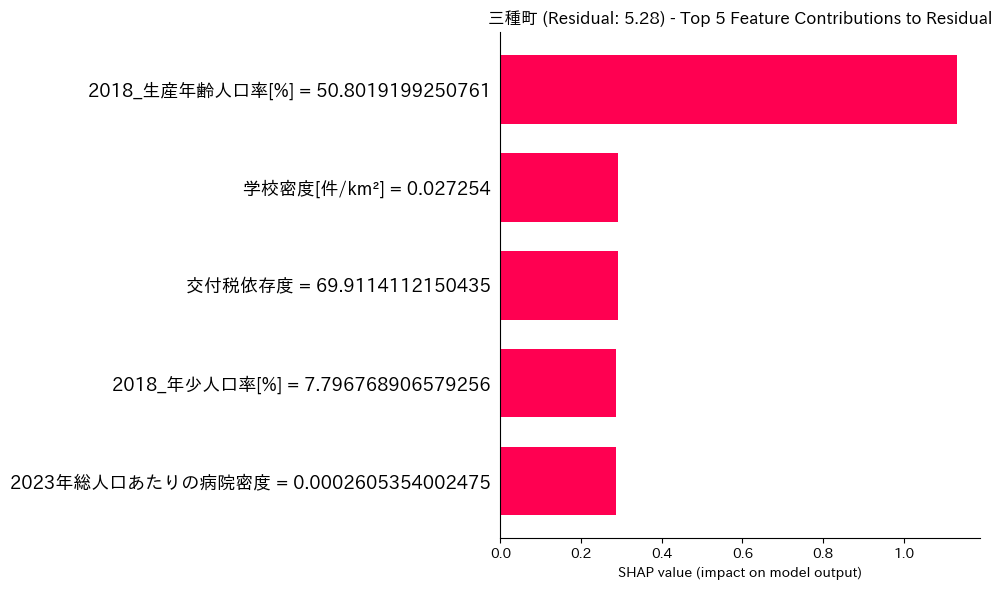

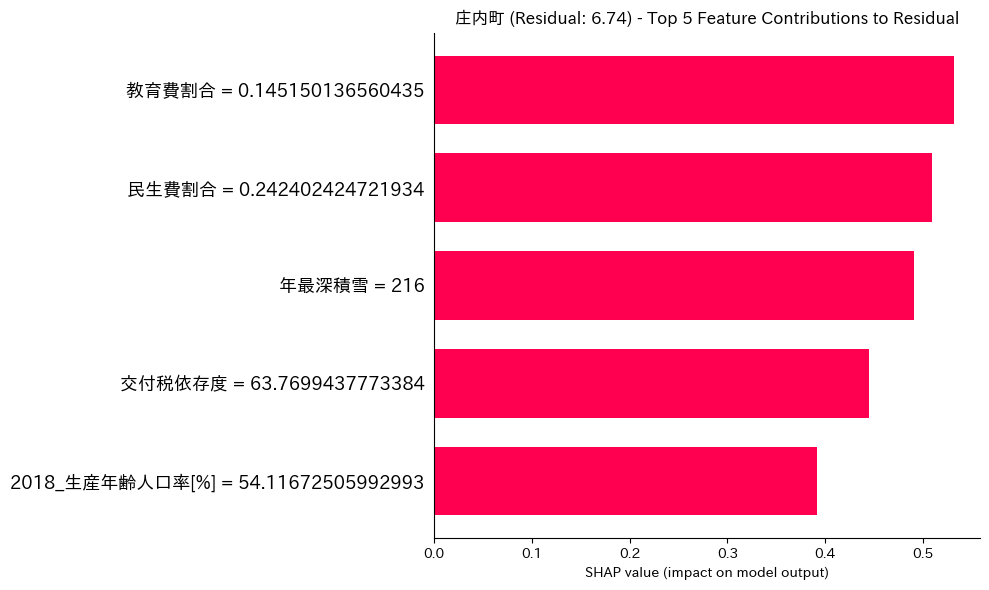

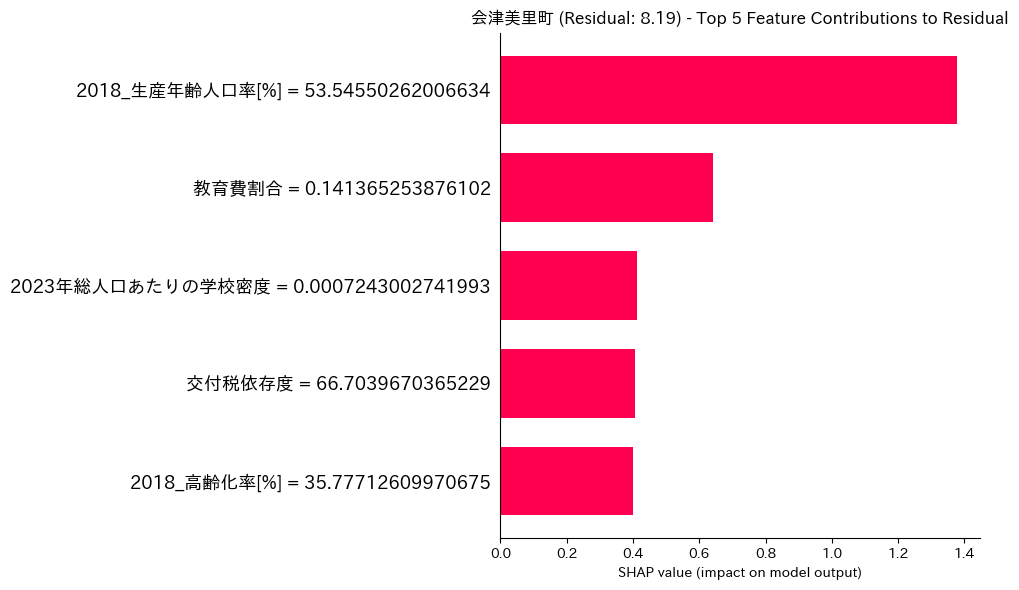

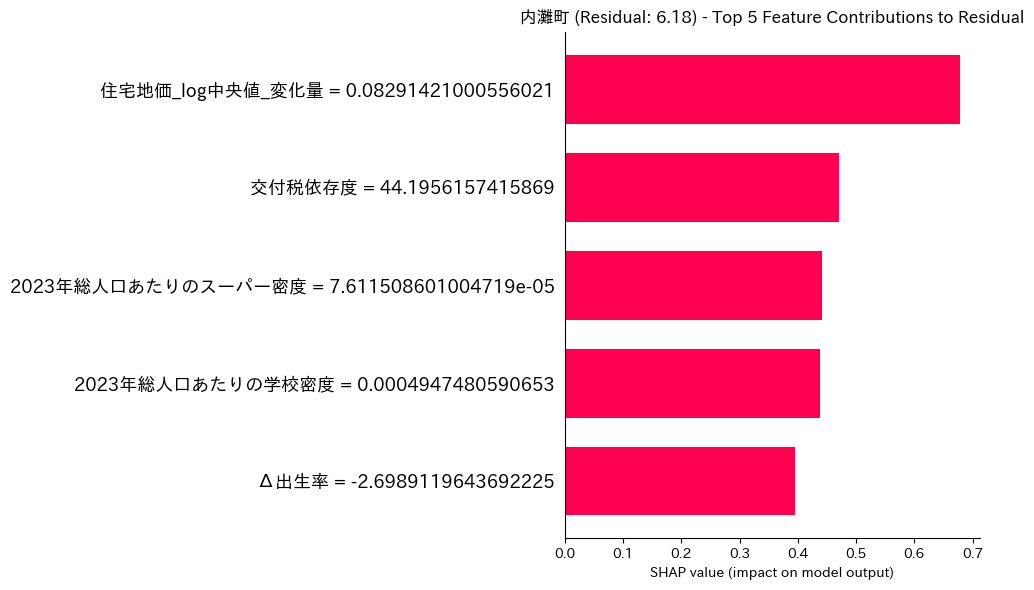

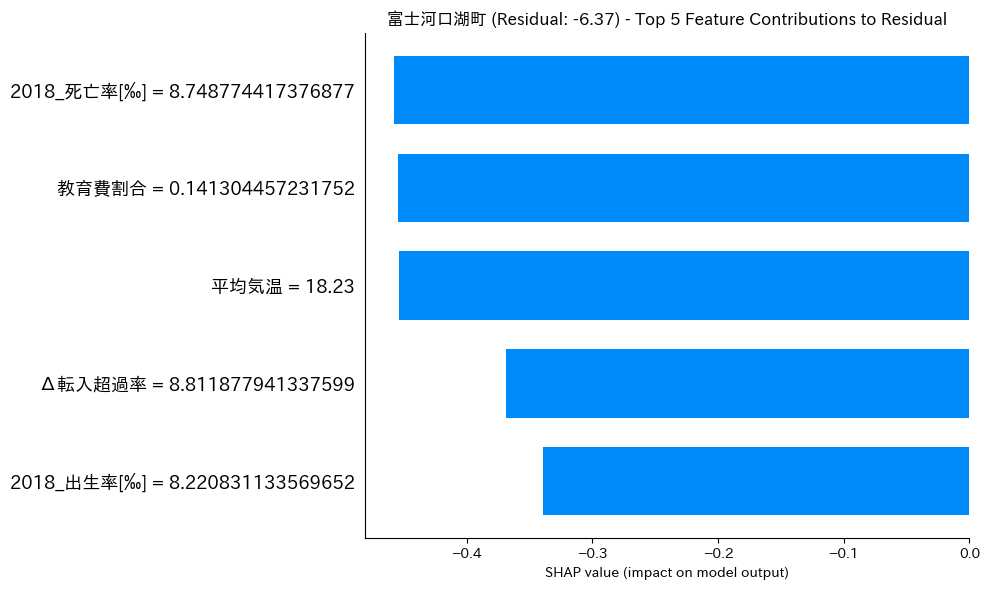

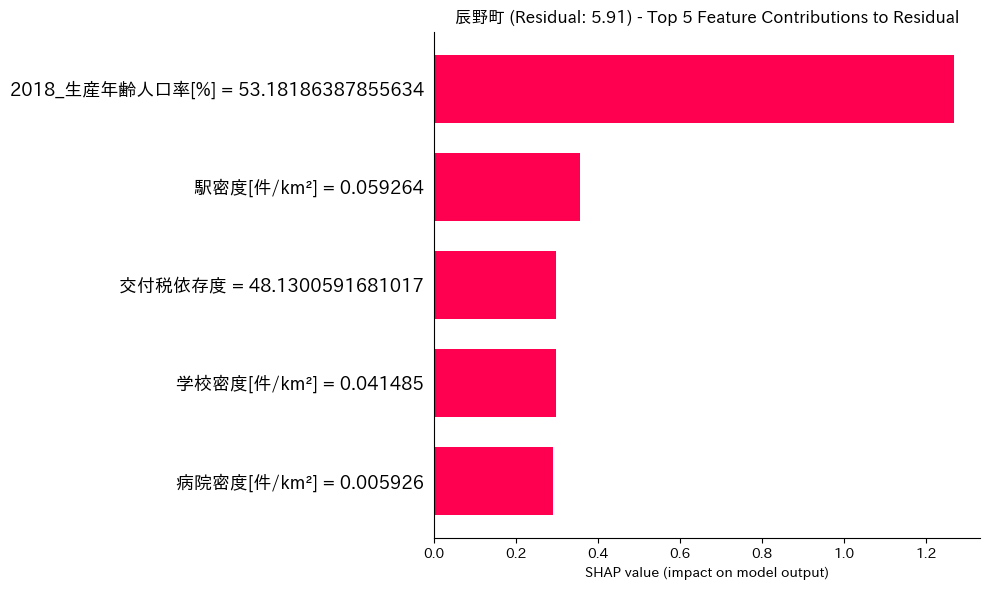

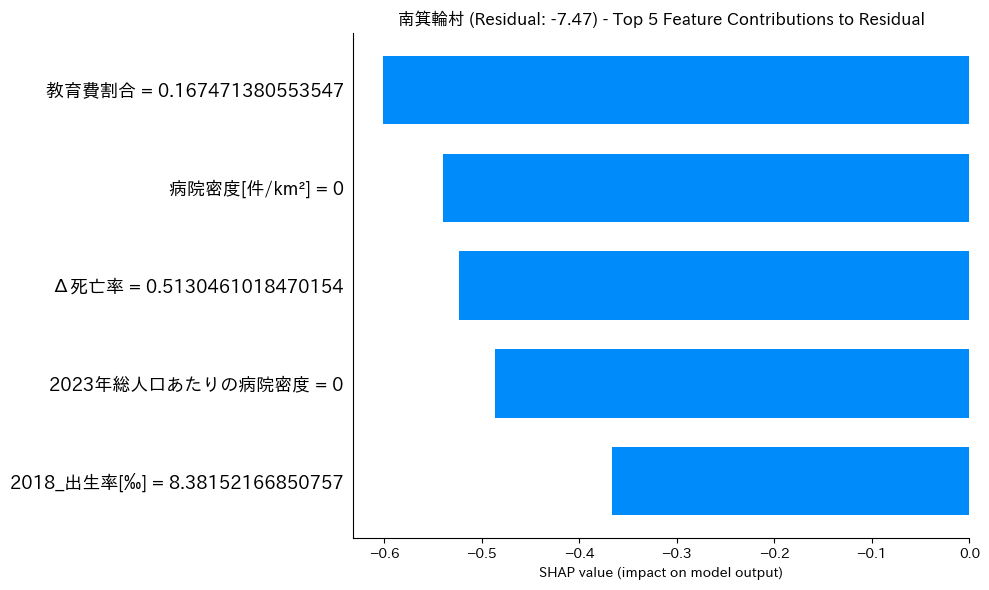

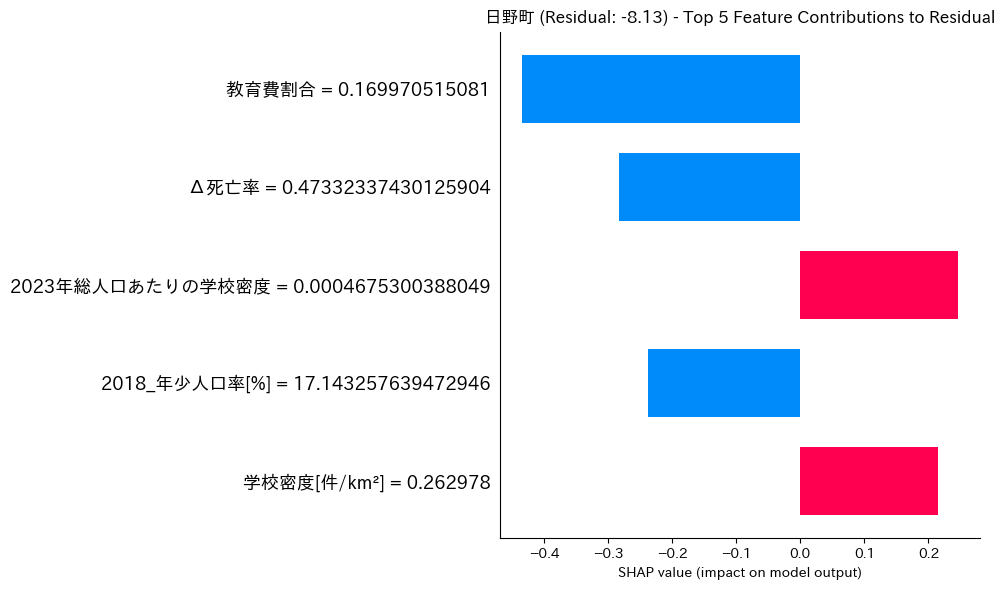

In [ ]:
import matplotlib.pyplot as plt

for index, info in top_shap_info.items():
    # Extract information
    shap_values_subset = info['shap_values']
    feature_values_subset = info['feature_values']
    features_subset = info['features']
    base_value = info['base_value']

    # Get municipality name and residual for the title
    municipality_name = df_bl.loc[index, '市区町村名_2023']
    residual_value = df_bl.loc[index, 'residual']

    # Create SHAP bar plot
    plt.figure(figsize=(10, 6))
    shap.bar_plot(shap_values_subset, feature_values_subset, features_subset, show=False)

    # # Add title
    plt.title(f'{municipality_name} (Residual: {residual_value:.2f}) - Top 5 Feature Contributions to Residual')
    plt.tight_layout()
    plt.show()

### 残差要因の可視化
各自治体の視覚化結果が何を示しているかを簡単に説明し、
残差上位5下位5地域の正または負の残差に寄与する要因可視化

In [ ]:
print("Explanation of SHAP values for Top 5 and Bottom 5 Residual Municipalities:")

# Top 5 Residuals
print("\n--- Top 5 Positive Residuals (Actual Vacancy Rate higher than Baseline Prediction) ---")
for index in df_bl.nlargest(5, 'residual').index:
    municipality_name = df_bl.loc[index, '市区町村名_2023']
    residual_value = df_bl.loc[index, 'residual']
    print(f"\n{municipality_name} (Residual: {residual_value:.2f}):")
    # Find the corresponding info in top_shap_info
    info = top_shap_info[index]
    features = info['features']
    shap_values_subset = info['shap_values']

    print("  Key Features Contributing to Higher Vacancy Rate:")
    for i in range(len(features)):
        print(f"    - {features[i]}: SHAP Value = {shap_values_subset[i]:.2f}")

# Bottom 5 Residuals
print("\n--- Bottom 5 Negative Residuals (Actual Vacancy Rate lower than Baseline Prediction) ---")
for index in df_bl.nsmallest(5, 'residual').index:
    municipality_name = df_bl.loc[index, '市区町村名_2023']
    residual_value = df_bl.loc[index, 'residual']
    print(f"\n{municipality_name} (Residual: {residual_value:.2f}):")
    # Find the corresponding info in top_shap_info
    info = top_shap_info[index]
    features = info['features']
    shap_values_subset = info['shap_values']

    print("  Key Features Contributing to Lower Vacancy Rate:")
    for i in range(len(features)):
        print(f"    - {features[i]}: SHAP Value = {shap_values_subset[i]:.2f}")

Explanation of SHAP values for Top 5 and Bottom 5 Residual Municipalities:

--- Top 5 Positive Residuals (Actual Vacancy Rate higher than Baseline Prediction) ---

会津美里町 (Residual: 8.19):
  Key Features Contributing to Higher Vacancy Rate:
    - 2018_生産年齢人口率[%]: SHAP Value = 1.38
    - 教育費割合: SHAP Value = 0.64
    - 2023年総人口あたりの学校密度: SHAP Value = 0.41
    - 交付税依存度: SHAP Value = 0.40
    - 2018_高齢化率[%]: SHAP Value = 0.40

庄内町 (Residual: 6.74):
  Key Features Contributing to Higher Vacancy Rate:
    - 教育費割合: SHAP Value = 0.53
    - 民生費割合: SHAP Value = 0.51
    - 年最深積雪: SHAP Value = 0.49
    - 交付税依存度: SHAP Value = 0.44
    - 2018_生産年齢人口率[%]: SHAP Value = 0.39

内灘町 (Residual: 6.18):
  Key Features Contributing to Higher Vacancy Rate:
    - 住宅地価_log中央値_変化量: SHAP Value = 0.68
    - 交付税依存度: SHAP Value = 0.47
    - 2023年総人口あたりのスーパー密度: SHAP Value = 0.44
    - 2023年総人口あたりの学校密度: SHAP Value = 0.44
    - Δ出生率: SHAP Value = 0.40

辰野町 (Residual: 5.91):
  Key Features Contributing to Higher Vacancy Ra

### データ分析の主な結果

正の残差（実際の空室率が予測よりも高い）の上位5位の自治体では、2018年の生産年齢人口比率、教育費比率、地方交付税依存度、学校やスーパーマーケットの密度が、空室率が予測よりも高くなる主な要因.


負の残差が下位 5 位（実際の空室率が予測より低い）の自治体では、予想より低い空室率に寄与する主な特徴として、教育支出比率、病院密度、2018 年の死亡率、病院や学校に関連する密度が含まれる。


特定された上位および下位の残余自治体の特定の特徴と地域的状況を調査して、モデルの予測が大きく逸脱した理由を示した。

